# Report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(filename)
data.fillna(0)
data = data.loc[:, data.columns != "Name"]
data = data.apply(lambda x: x.replace('--','0').replace('_._','0'))
data = data.astype(float)

## Overview

In [4]:
data.describe()

,Position,Price,Quality,Service,Space,ZAvg_Score
count,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,7.355000,7.235455,7.387980,7.271616,7.031919,7.254646
std,1.420236,1.616413,1.726088,1.659128,1.538543,1.449386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.900000,6.500000,6.700000,6.600000,6.275000,6.700000
50%,7.400000,7.300000,7.500000,7.300000,7.000000,7.300000
75%,8.000000,8.000000,8.400000,8.200000,8.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


### Score Distribution

#### Histogram

<AxesSubplot:xlabel='Position', ylabel='Density'>

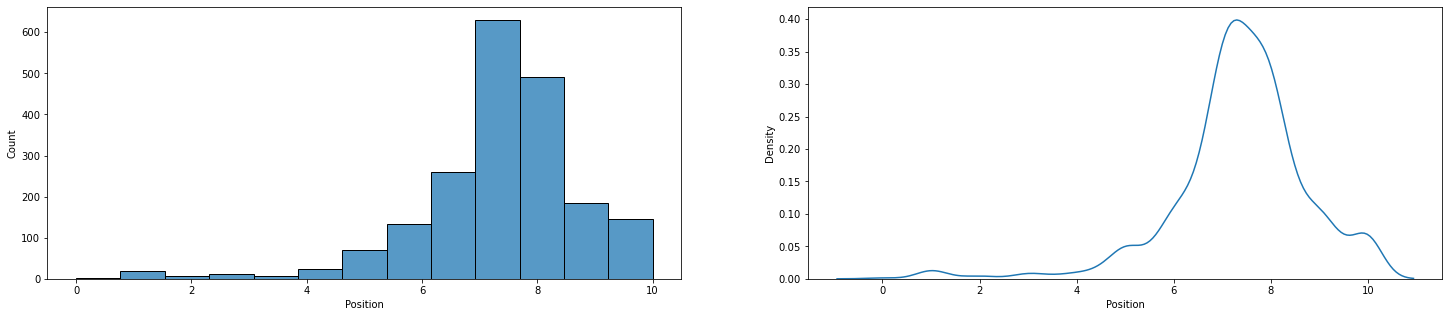

In [9]:
fig, axis = plt.subplots(nrows = 1, ncols= 2, figsize=(25,5))
plt.subplots_adjust(wspace = 0.20)

ax = sns.histplot(data['Position'], bins=13, ax = axis[0])
sns.kdeplot(data['Position'],ax = axis[1])

<div align="center" ><i>Histogram of 'Position' column.</i></div>

<AxesSubplot:xlabel='Price', ylabel='Density'>

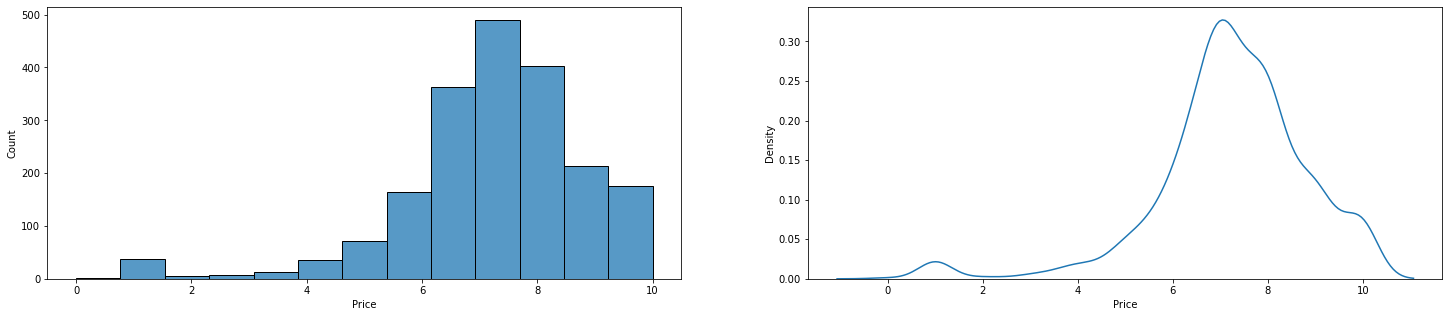

In [10]:
fig, axis = plt.subplots(nrows = 1, ncols= 2, figsize=(25,5))
plt.subplots_adjust(wspace = 0.20)

ax = sns.histplot(data['Price'], bins=13, ax = axis[0])
sns.kdeplot(data['Position'],ax = axis[1])

<div align="center" ><i>Histogram of 'Price' column.</i></div>

<AxesSubplot:xlabel='Quality', ylabel='Density'>

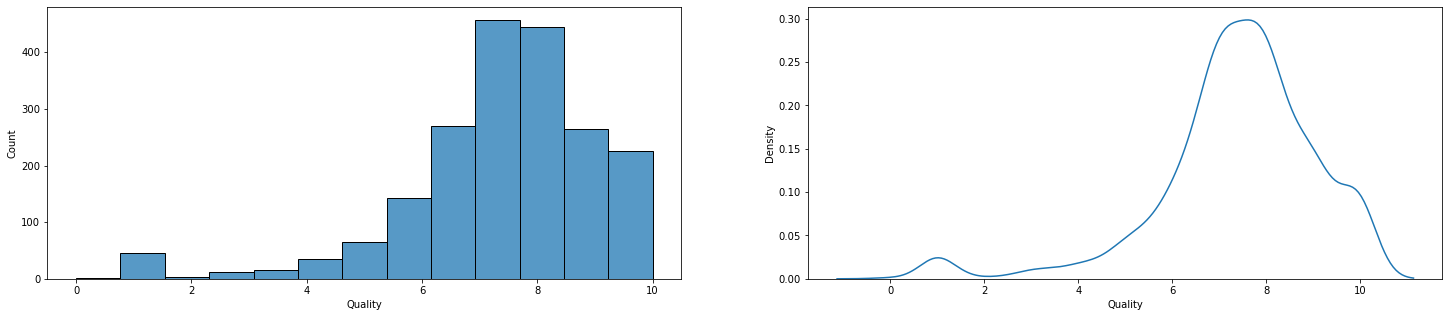

In [11]:
fig, axis = plt.subplots(nrows = 1, ncols= 2, figsize=(25,5))
plt.subplots_adjust(wspace = 0.20)

ax = sns.histplot(data['Quality'], bins=13, ax = axis[0])
sns.kdeplot(data['Quality'],ax = axis[1])

<div align="center" ><i>Histogram of 'Quality' column.</i></div>

<AxesSubplot:xlabel='Service', ylabel='Density'>

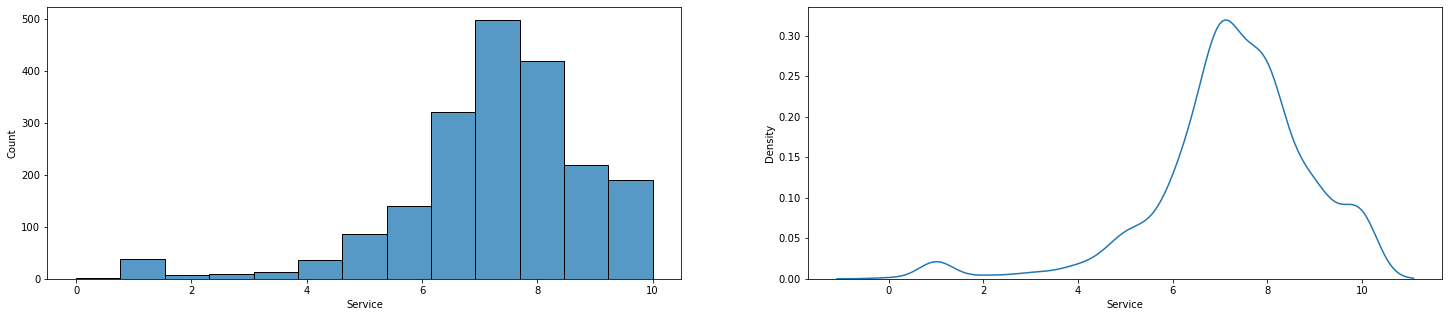

In [13]:
fig, axis = plt.subplots(nrows = 1, ncols= 2, figsize=(25,5))
plt.subplots_adjust(wspace = 0.20)

ax = sns.histplot(data['Service'], bins=13, ax = axis[0])
sns.kdeplot(data['Service'],ax = axis[1])

<div align="center" ><i>Histogram of 'Service' column.</i></div>

<AxesSubplot:xlabel='Space', ylabel='Density'>

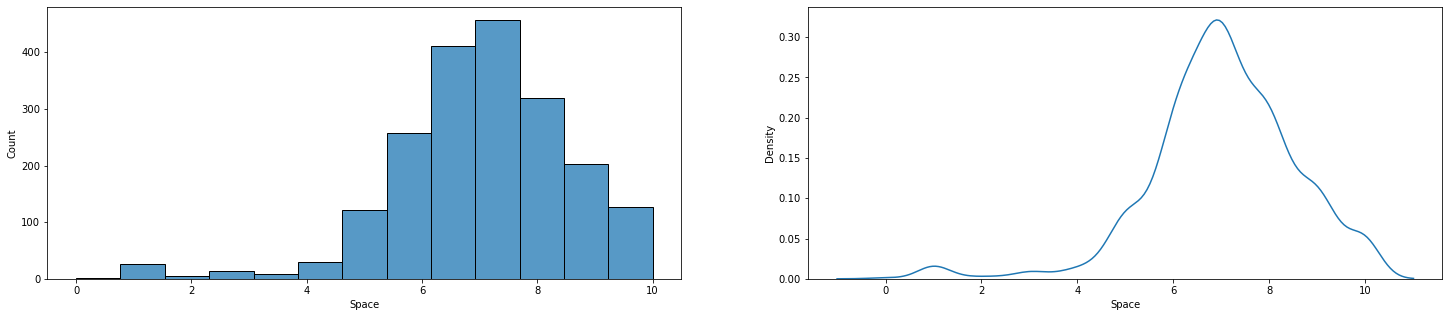

In [12]:
fig, axis = plt.subplots(nrows = 1, ncols= 2, figsize=(25,5))
plt.subplots_adjust(wspace = 0.20)

ax = sns.histplot(data['Space'], bins=13, ax = axis[0])
sns.kdeplot(data['Space'],ax = axis[1])

<div align="center" ><i>Histogram of 'Space' column.</i></div>

<AxesSubplot:xlabel='ZAvg_Score', ylabel='Density'>

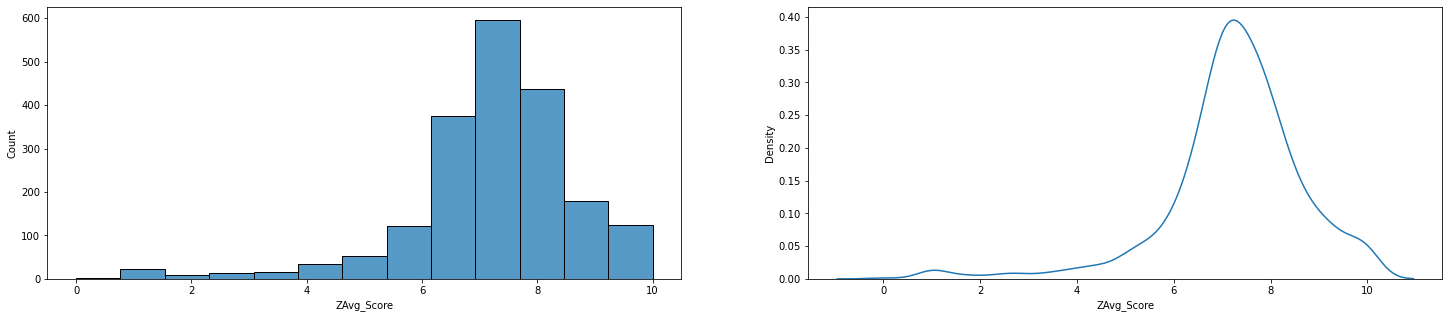

In [18]:
fig, axis = plt.subplots(nrows = 1, ncols= 2, figsize=(25,5))
plt.subplots_adjust(wspace = 0.20)

ax = sns.histplot(data['ZAvg_Score'], bins=13, ax = axis[0])
sns.kdeplot(data['ZAvg_Score'],ax = axis[1])

<div align="center" ><i>Histogram of 'Avg_Score' column.</i></div>

#### Box plot

<AxesSubplot:>

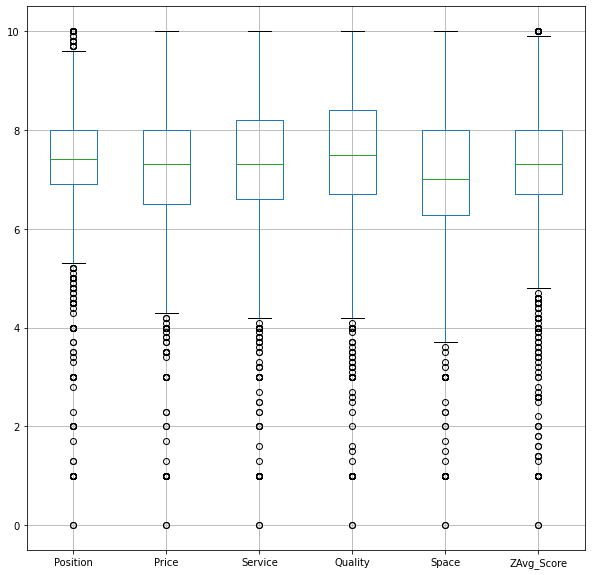

In [17]:
data.boxplot(column =['Position','Price','Service','Quality','Space','ZAvg_Score'], figsize=(10,10))

## Data Correlation

In [19]:
df_corr_table = pd.DataFrame()
df_corr_table = data.corr()

<AxesSubplot:>

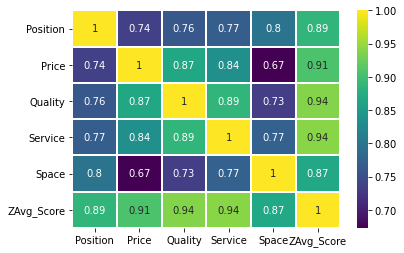

In [20]:
sns.heatmap(df_corr_table, annot = True, cmap = "viridis",linecolor='white',linewidths=1)

Heat map that show the relationship between columns.

### Most Correlaion

<AxesSubplot:xlabel='Quality', ylabel='Price'>

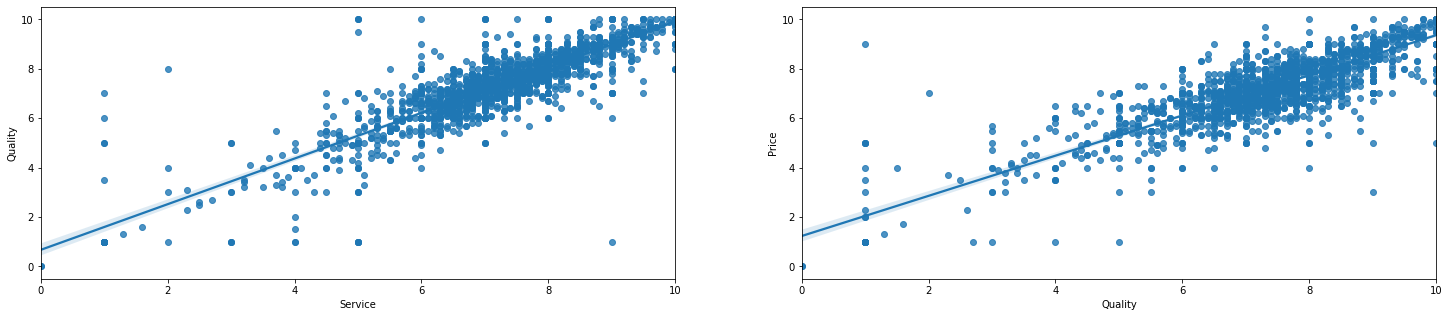

In [10]:
fig, axis = plt.subplots(nrows = 1, ncols= 2, figsize=(25,5))
plt.subplots_adjust(wspace = 0.20)

sns.regplot(x="Service", y="Quality", data=data, ax = axis[0])
sns.regplot(x="Quality", y="Price", data=data, ax = axis[1])

Scatter plot of 2 pairs of most correlatetd column.

### Least Correlation

<AxesSubplot:xlabel='Space', ylabel='Price'>

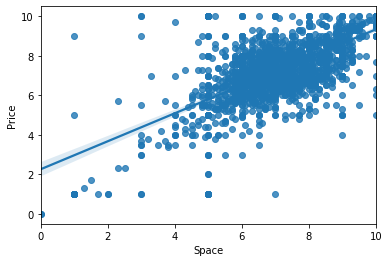

In [45]:
sns.regplot(x="Space", y="Price", data=data)

Scatter plot of 1 pair of least correlatetd column.

## Factor affect Average Score

### Most affect

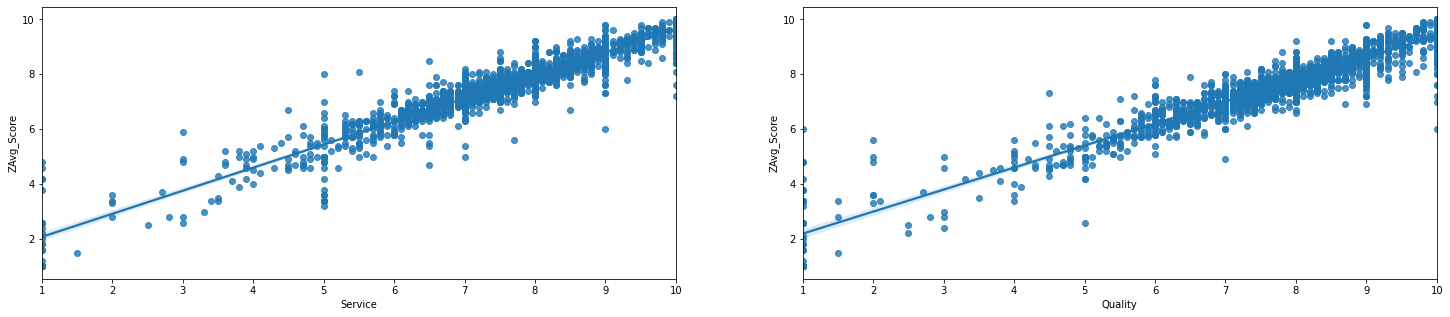

In [9]:
fig, axis = plt.subplots(nrows = 1, ncols= 2, figsize=(25,5))
plt.subplots_adjust(wspace = 0.20)

ax = sns.regplot(x="Service", y="ZAvg_Score", data=data, ax = axis[0])
ax = sns.regplot(x="Quality", y="ZAvg_Score", data=data, ax = axis[1])

Scatter plot show the relationship of 'Service' and 'Quality' with Average Score

### Least affect

<AxesSubplot:xlabel='Position', ylabel='ZAvg_Score'>

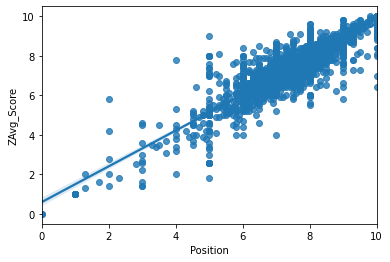

In [21]:
sns.regplot(x="Position", y="ZAvg_Score", data=data)

Scatter plot show the relationship of 'Position' with Average Score